In [2]:
import pandas as pd
data = pd.read_csv('WineQT.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
data.describe().style.background_gradient()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


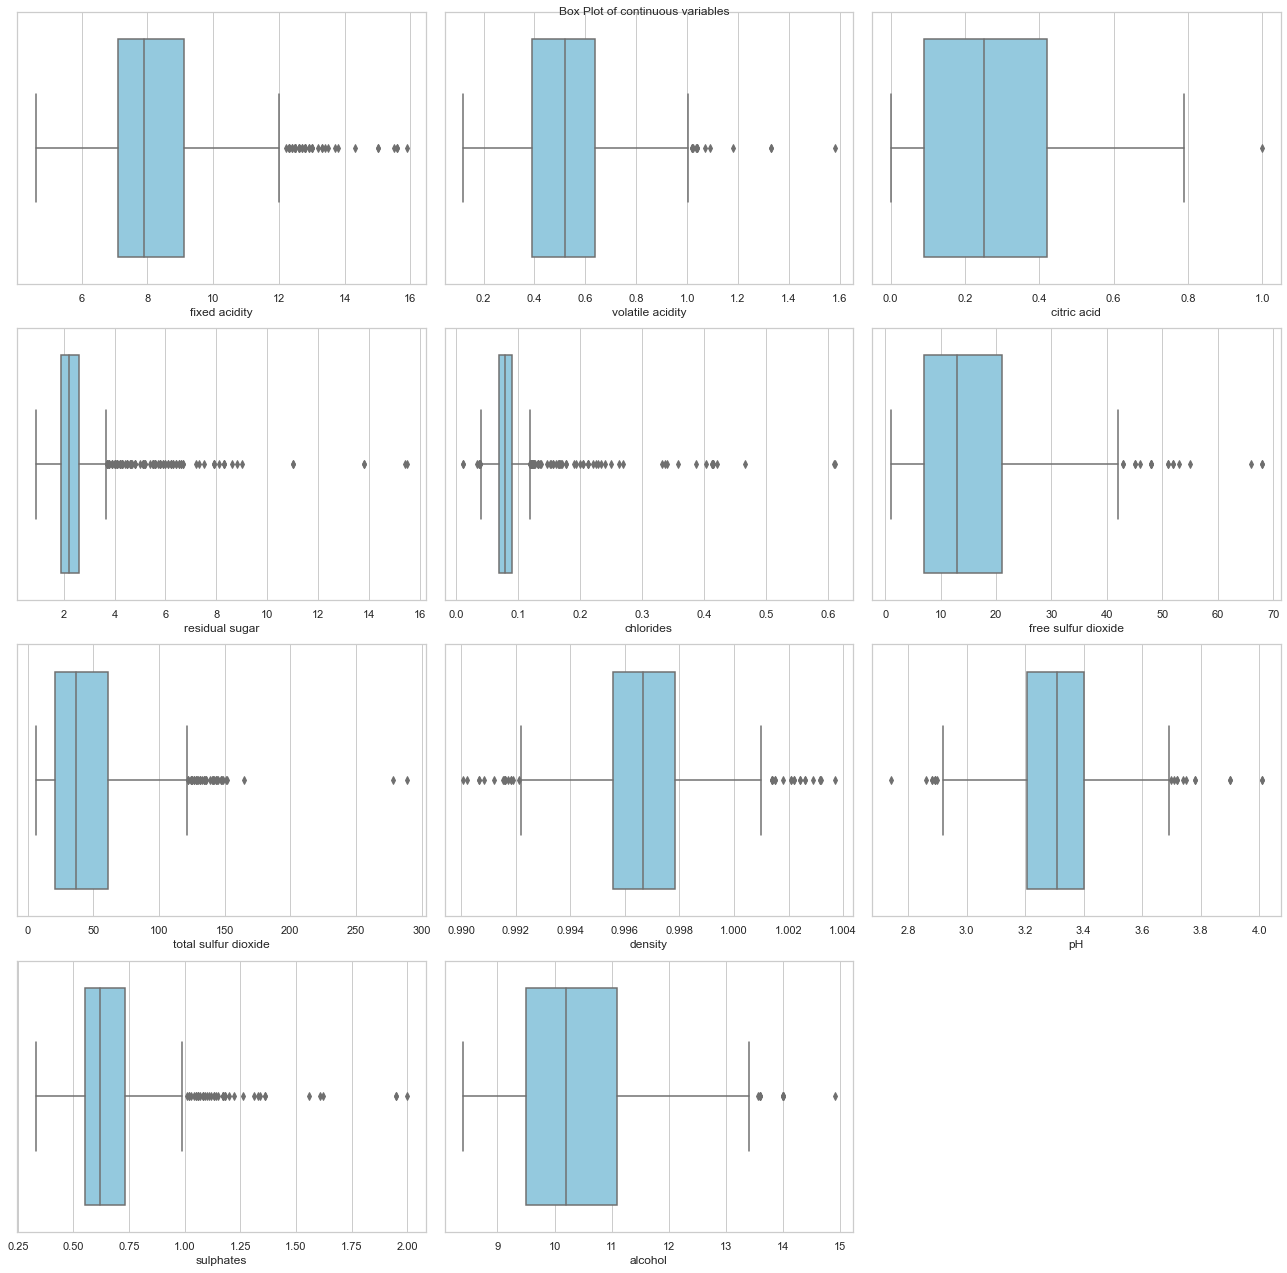

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
data1 = data.drop(['Id'],axis=1)
plt.figure(figsize=(18, 18))
for i, col in enumerate(data1.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data=data1, x=col, ax=ax,color='skyblue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

## 이상치 제거

In [6]:
q3 = data1.quantile(0.75) 
q1 = data1.quantile(0.25)
iqr = q3 - q1
iqr

fixed acidity            2.000000
volatile acidity         0.247500
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002275
pH                       0.195000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64

In [7]:
def dr_outlier(df):
    quartile_1 = df.quantile(0.25)
    quartile_3 = df.quantile(0.75)
    IQR = quartile_3 - quartile_1
    condition = (df < (quartile_1 - 1.5 * IQR)) | (df > (quartile_3 + 1.5 * IQR))
    condition = condition.any(axis=1)
    search_df = df[condition]
 
    return search_df, df.drop(search_df.index, axis=0)
new_data, _ = dr_outlier(data1)
new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
11,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5
13,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
25,7.8,0.645,0.00,5.5,0.086,5.0,18.0,0.99860,3.40,0.55,9.6,6
28,7.3,0.450,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
30,7.5,0.490,0.20,2.6,0.332,8.0,14.0,0.99680,3.21,0.90,10.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1113,7.8,0.600,0.26,2.0,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
1114,7.8,0.600,0.26,2.0,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
1122,6.4,0.360,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.4,6
1123,6.4,0.380,0.14,2.2,0.038,15.0,25.0,0.99514,3.44,0.65,11.1,6


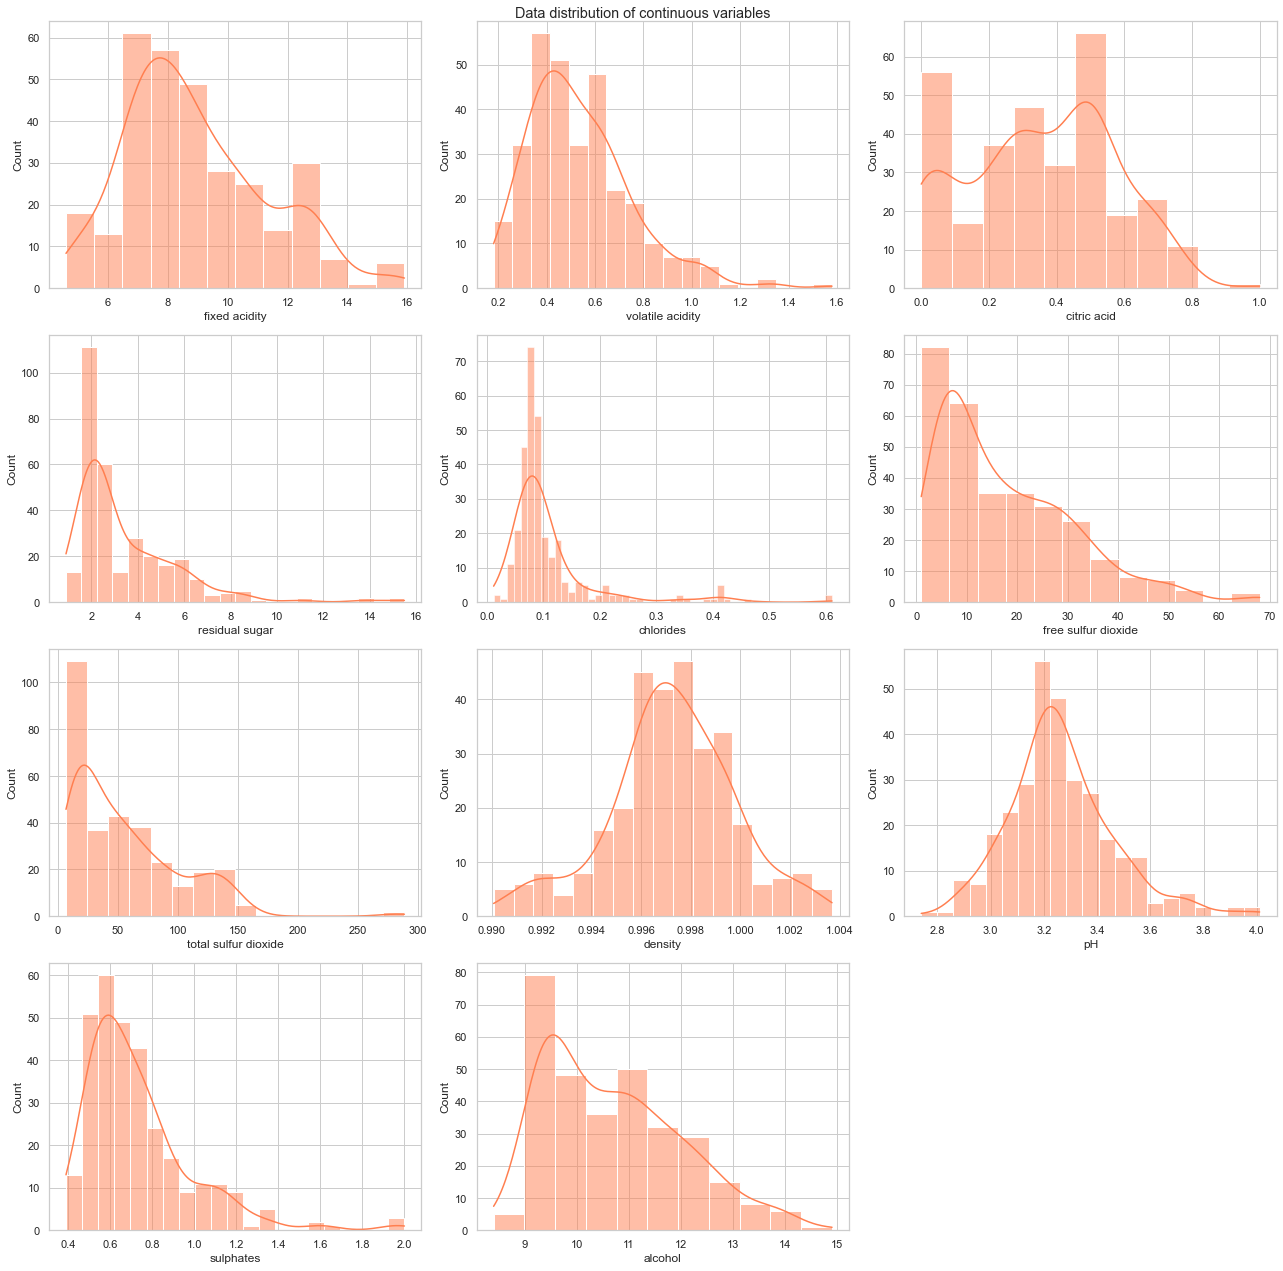

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 18))
for i, col in enumerate(new_data.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=new_data, x=col, ax=ax,color='coral',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

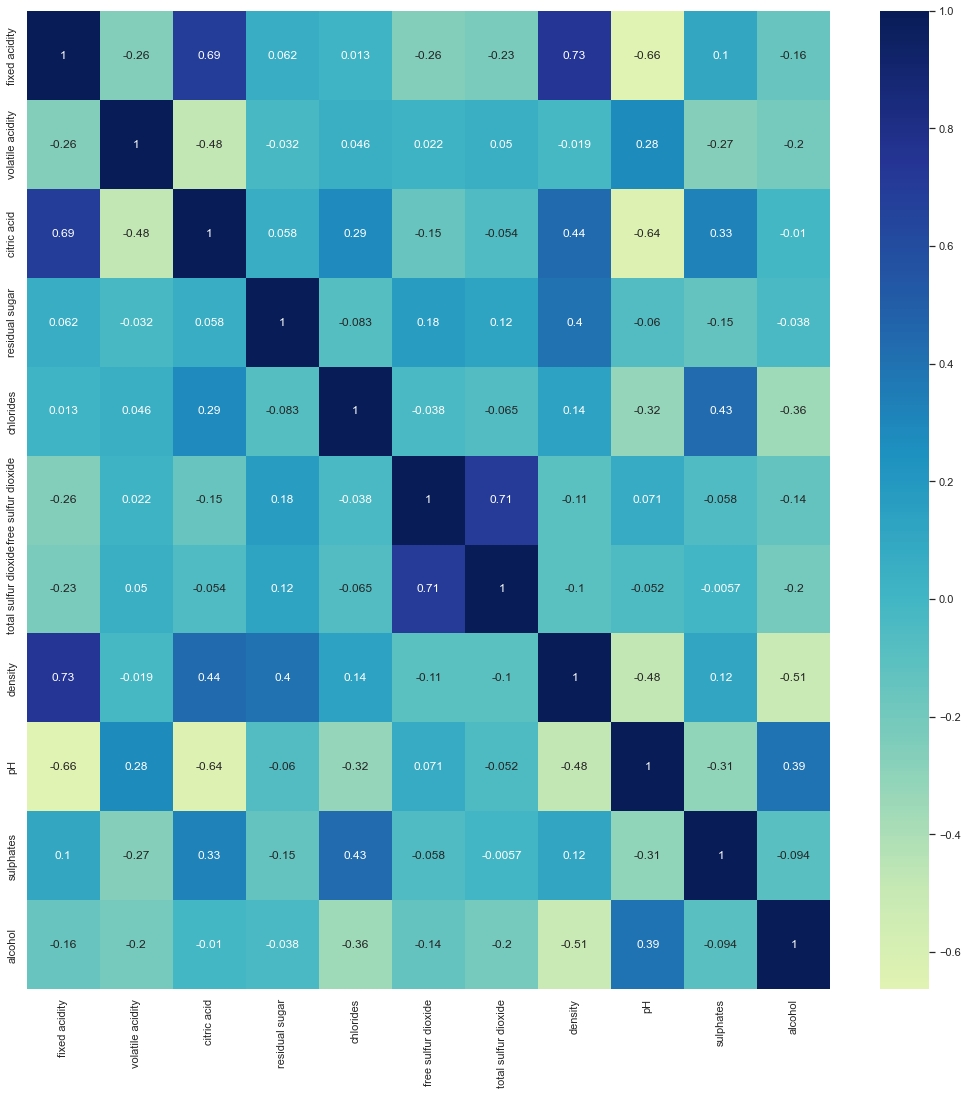

In [9]:
plt.figure(figsize=(18,18))
sns.heatmap(new_data.select_dtypes(include=['float']).corr(),annot=True,center = 0,cmap="YlGnBu")
plt.show()

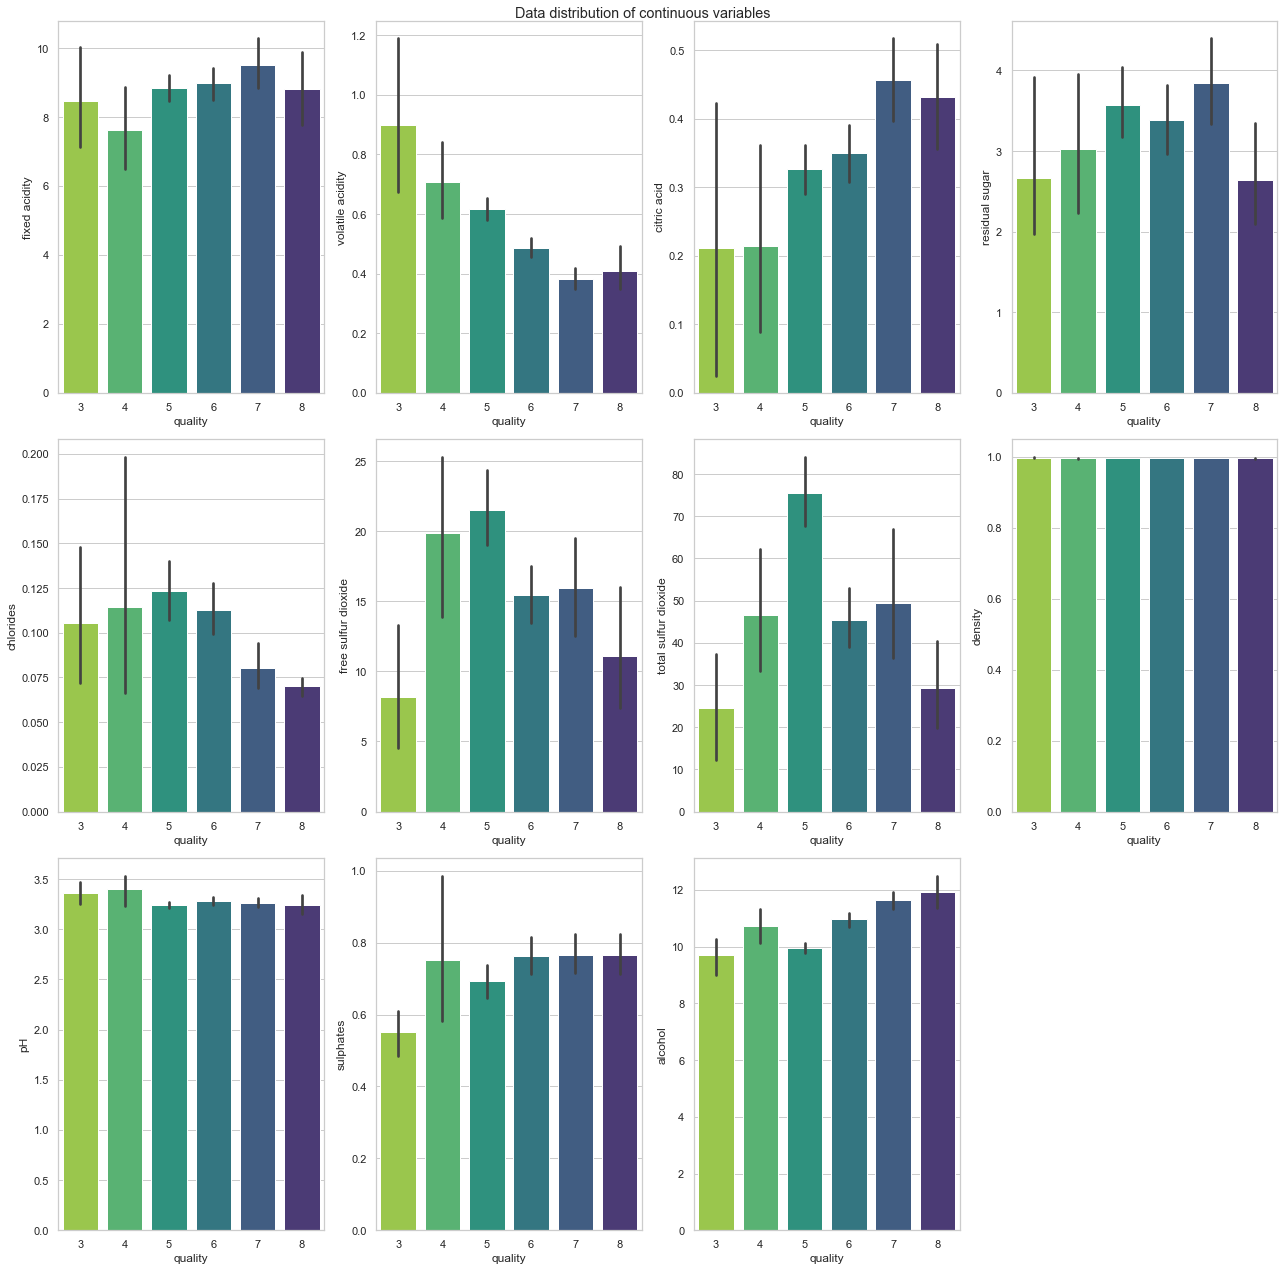

In [12]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(new_data.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(3,4, i+1)
    sns.barplot(data=new_data, x='quality', y=col, ax=ax,edgecolor="white",palette='viridis_r')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

In [11]:
new_data.to_csv('data_wine.csv',index=False)